In [4]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm
import baseline



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
new = []
base = []

for i in range(1,18):
    for _ in range(1):
        problem_file = 'STAGE1_'+str(i)+'.json'
        timelimit = 60

        # np.random.seed(1)

        with open(problem_file, 'r') as f:
            prob = json.load(f)
        K = prob['K']
        ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
        ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]
        DIST = np.array(prob['DIST'])
        for r in ALL_RIDERS:
            r.T = np.round(DIST/r.speed + r.service_time)

        alg_start_time = time.time()
        exception = None
        solution = None
        solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
        #solution = baseline.algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
        alg_end_time = time.time()

        checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

        checked_solution['time'] = alg_end_time - alg_start_time
        checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
        checked_solution['exception'] = exception

        checked_solution['prob_name'] = prob['name']
        checked_solution['prob_file'] = problem_file

        new.append(checked_solution)
        print(f'{i}. new : {checked_solution}')


        alg_start_time = time.time()
        exception = None
        solution = None
        #solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
        solution = baseline.algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
        alg_end_time = time.time()

        checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

        checked_solution['time'] = alg_end_time - alg_start_time
        checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
        checked_solution['exception'] = exception

        checked_solution['prob_name'] = prob['name']
        checked_solution['prob_file'] = problem_file

        print(f'{i}. base : {checked_solution}')
        base.append(checked_solution)

        '''try:
            if before["avg_cost"] > after["avg_cost"]:
                print(i)
                print(before)
                print(after)
        except Exception as e:
            print(f'error : {e}')'''

{'total_cost': 888757.1999999997, 'avg_cost': 2962.523999999999, 'num_drivers': 150, 'total_dist': 307102, 'feasible': True, 'infeasibility': None, 'bundles': [['WALK', [18, 0], [18, 0]], ['WALK', [31, 1], [31, 1]], ['WALK', [2, 153], [2, 153]], ['WALK', [3, 83], [3, 83]], ['BIKE', [10, 4], [10, 4]], ['BIKE', [5, 42], [42, 5]], ['BIKE', [82, 6], [82, 6]], ['WALK', [7, 44], [7, 44]], ['WALK', [8, 108], [8, 108]], ['BIKE', [9, 52], [52, 9]], ['BIKE', [46, 11], [11, 46]], ['WALK', [33, 12], [33, 12]], ['WALK', [13, 57], [13, 57]], ['BIKE', [14, 148], [14, 148]], ['BIKE', [15, 50], [15, 50]], ['BIKE', [16, 86], [86, 16]], ['BIKE', [17, 87], [87, 17]], ['BIKE', [124, 19], [19, 124]], ['WALK', [20, 72], [20, 72]], ['BIKE', [21, 71], [71, 21]], ['WALK', [22, 120], [120, 22]], ['BIKE', [112, 23], [112, 23]], ['BIKE', [35, 24], [35, 24]], ['WALK', [25, 110], [25, 110]], ['BIKE', [26, 56], [26, 56]], ['WALK', [27, 133], [27, 133]], ['BIKE', [67, 28], [67, 28]], ['BIKE', [29, 80], [29, 80]], ['BI

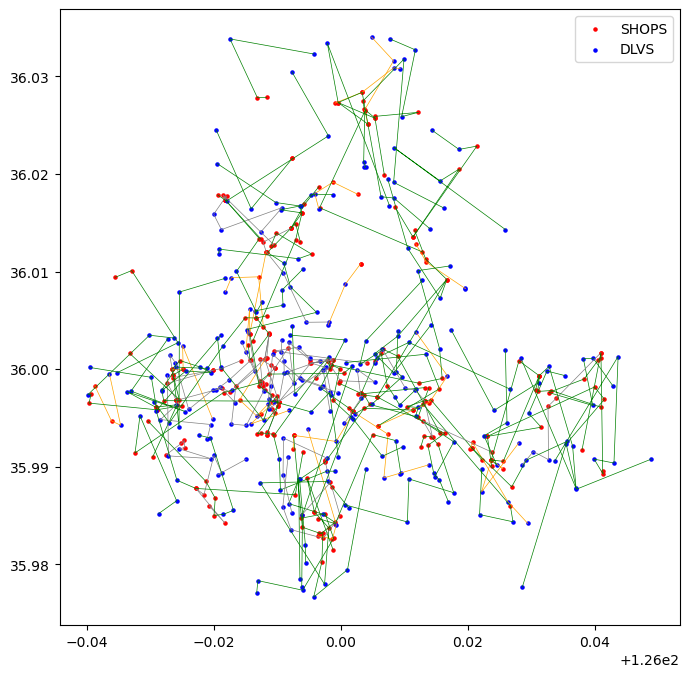

In [6]:
draw_route_solution(ALL_ORDERS, checked_solution)

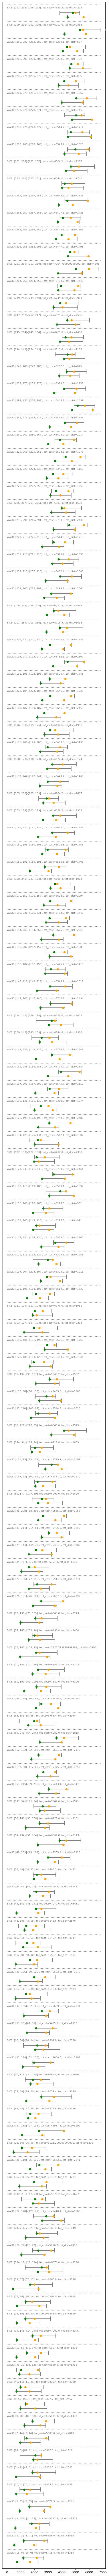

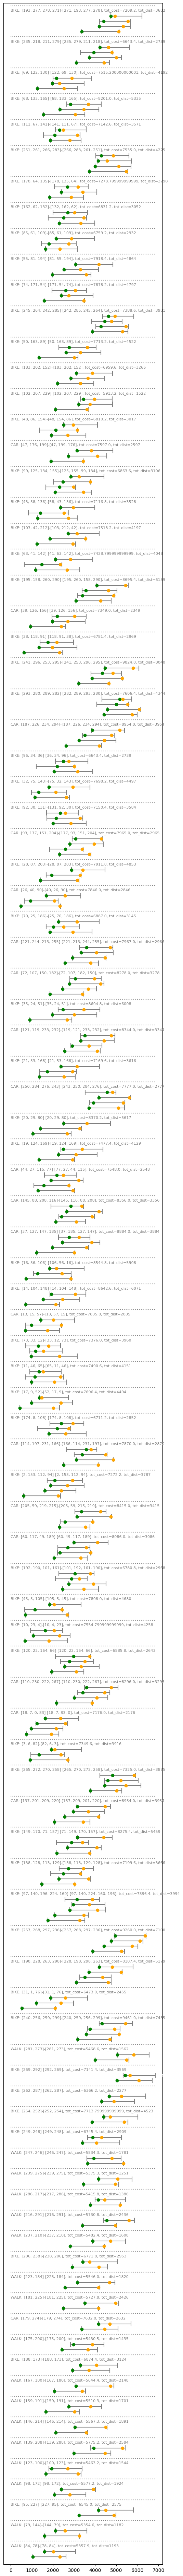

In [9]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, new[0])
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, base[0])

In [8]:
for item in new:
    print(item)
print()
for item in base:
    print(item)

{'total_cost': 888757.1999999997, 'avg_cost': 2962.523999999999, 'num_drivers': 150, 'total_dist': 307102, 'feasible': True, 'infeasibility': None, 'bundles': [['WALK', [18, 0], [18, 0]], ['WALK', [31, 1], [31, 1]], ['WALK', [2, 153], [2, 153]], ['WALK', [3, 83], [3, 83]], ['BIKE', [10, 4], [10, 4]], ['BIKE', [5, 42], [42, 5]], ['BIKE', [82, 6], [82, 6]], ['WALK', [7, 44], [7, 44]], ['WALK', [8, 108], [8, 108]], ['BIKE', [9, 52], [52, 9]], ['BIKE', [46, 11], [11, 46]], ['WALK', [33, 12], [33, 12]], ['WALK', [13, 57], [13, 57]], ['BIKE', [14, 148], [14, 148]], ['BIKE', [15, 50], [15, 50]], ['BIKE', [16, 86], [86, 16]], ['BIKE', [17, 87], [87, 17]], ['BIKE', [124, 19], [19, 124]], ['WALK', [20, 72], [20, 72]], ['BIKE', [21, 71], [71, 21]], ['WALK', [22, 120], [120, 22]], ['BIKE', [112, 23], [112, 23]], ['BIKE', [35, 24], [35, 24]], ['WALK', [25, 110], [25, 110]], ['BIKE', [26, 56], [26, 56]], ['WALK', [27, 133], [27, 133]], ['BIKE', [67, 28], [67, 28]], ['BIKE', [29, 80], [29, 80]], ['BI